In [27]:
import pandas as pd
import numpy  as np
import seaborn as sns
from sklearn.cluster import KMeans

pd.options.display.max_rows = 300000

In [51]:
#"Valor de Venda(1)"
def Troca (file):
    
    S = []
    for i in range(len(file["Valor de Venda"])):
        S.append(float(file["Valor de Venda"][i].replace(',','.')))
    file["Valor de Venda(1)"] = S
    
def Normal (file):
    return (file - file.mean())/file.std()
    

In [88]:
Gas_file_2004 = pd.read_csv("glp-2004-01.csv",sep=';')
Troca(Gas_file_2004)
Combutivel_file_2004 = pd.read_csv("ca-2004-01.csv",sep=';')
Troca(Combutivel_file_2004)
Gas_file_2022 = pd.read_csv("glp-2022-02.csv",sep=';')
Troca(Gas_file_2022)
Combutivel_file_2022 = pd.read_csv("ca-2022-02.csv",sep=';')
Troca(Combutivel_file_2022)

In [89]:
# utilizando "pd.merge" para contruir os data frame
df_file = pd.Series(dtype=object)
file_2004 = pd.Series(dtype=object)
file_2022 = pd.Series(dtype=object)

file_2004 = pd.merge(Combutivel_file_2004.groupby("Estado - Sigla")["Valor de Venda(1)"].mean(), Gas_file_2004.groupby("Estado - Sigla")["Valor de Venda(1)"].mean(), on="Estado - Sigla", suffixes=('_ca', '_glp'))
file_2022 = pd.merge(Combutivel_file_2022.groupby("Estado - Sigla")["Valor de Venda(1)"].mean(), Gas_file_2022.groupby("Estado - Sigla")["Valor de Venda(1)"].mean(), on="Estado - Sigla", suffixes=('_ca', '_glp'))

df_file = pd.merge(file_2004, file_2022, on="Estado - Sigla", suffixes=('_2004', '_2022'))
df_file

,Valor de Venda(1)_ca_2004,Valor de Venda(1)_glp_2004,Valor de Venda(1)_ca_2022,Valor de Venda(1)_glp_2022
Estado - Sigla,,,,
AC,1.952826,36.255114,6.688240,126.767494
AL,1.575064,31.531138,5.803515,107.529069
AM,1.710626,28.835837,5.887616,117.062208
AP,1.868397,34.596190,5.830328,121.835199
BA,1.621504,31.768457,6.004413,111.588472
CE,1.694108,31.544574,5.888777,114.333763
DF,1.631898,32.710784,5.484101,103.505405
ES,1.533858,29.414663,5.690251,106.073568
GO,1.531887,29.609190,5.535143,115.829365


In [90]:
normalized_df = Normal(df_file)
normalized_df

,Valor de Venda(1)_ca_2004,Valor de Venda(1)_glp_2004,Valor de Venda(1)_ca_2022,Valor de Venda(1)_glp_2022
Estado - Sigla,,,,
AC,2.335436,1.868029,2.820905,1.546246
AL,-0.536535,-0.206410,-0.080855,-0.861847
AM,0.494091,-1.389997,0.194981,0.331426
AP,1.693559,1.139546,0.007087,0.928866
BA,-0.183469,-0.102196,0.578058,-0.353727
CE,0.368512,-0.200510,0.198789,-0.010097
DF,-0.104443,0.311608,-1.128484,-1.365493
ES,-0.849807,-1.135817,-0.452344,-1.044033
GO,-0.864792,-1.050394,-0.961073,0.177109


In [91]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(normalized_df)

C:\Users\josia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

<AxesSubplot:xlabel='Valor de Venda(1)_ca_2004', ylabel='Valor de Venda(1)_glp_2004'>

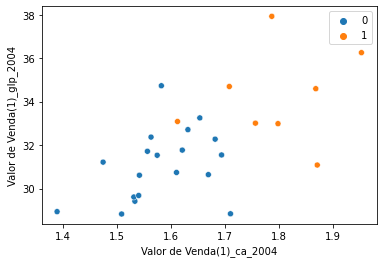

In [92]:
sns.scatterplot(data=df_file, x="Valor de Venda(1)_ca_2004", y="Valor de Venda(1)_glp_2004", hue=kmeans.labels_)

<AxesSubplot:xlabel='Valor de Venda(1)_ca_2022', ylabel='Valor de Venda(1)_glp_2022'>

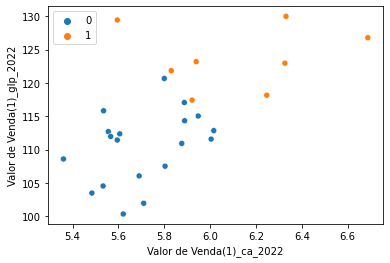

In [93]:
sns.scatterplot(data=df_file, x="Valor de Venda(1)_ca_2022", y="Valor de Venda(1)_glp_2022", hue=kmeans.labels_)

<AxesSubplot:xlabel='Valor de Venda(1)_ca_2004', ylabel='Valor de Venda(1)_ca_2022'>

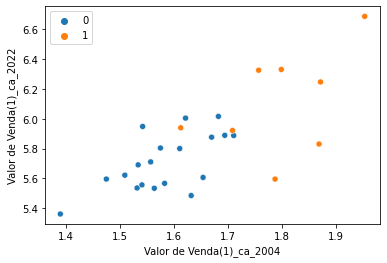

In [94]:
sns.scatterplot(data=df_file, x="Valor de Venda(1)_ca_2004", y="Valor de Venda(1)_ca_2022", hue=kmeans.labels_)

<AxesSubplot:xlabel='Valor de Venda(1)_glp_2004', ylabel='Valor de Venda(1)_glp_2022'>

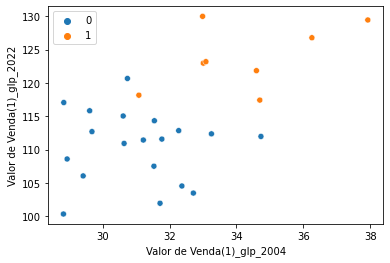

In [95]:
sns.scatterplot(data=df_file, x="Valor de Venda(1)_glp_2004", y="Valor de Venda(1)_glp_2022", hue=kmeans.labels_)

In [96]:
df_file[kmeans.labels_ == 1]

,Valor de Venda(1)_ca_2004,Valor de Venda(1)_glp_2004,Valor de Venda(1)_ca_2022,Valor de Venda(1)_glp_2022
Estado - Sigla,,,,
AC,1.952826,36.255114,6.688240,126.767494
AP,1.868397,34.596190,5.830328,121.835199
MT,1.787037,37.927329,5.594867,129.423882
PA,1.871133,31.081044,6.247198,118.162664
PI,1.708455,34.697006,5.921499,117.426663
RO,1.798514,32.986764,6.331280,129.969623
RR,1.756758,33.009042,6.326446,122.960243
TO,1.612661,33.085682,5.939340,123.185699


In [97]:
df_file[kmeans.labels_ == 0]

,Valor de Venda(1)_ca_2004,Valor de Venda(1)_glp_2004,Valor de Venda(1)_ca_2022,Valor de Venda(1)_glp_2022
Estado - Sigla,,,,
AL,1.575064,31.531138,5.803515,107.529069
AM,1.710626,28.835837,5.887616,117.062208
BA,1.621504,31.768457,6.004413,111.588472
CE,1.694108,31.544574,5.888777,114.333763
DF,1.631898,32.710784,5.484101,103.505405
ES,1.533858,29.414663,5.690251,106.073568
GO,1.531887,29.609190,5.535143,115.829365
MA,1.682268,32.272143,6.016087,112.855394
MG,1.540892,29.678263,5.555706,112.709813


## descobertas

A maior parte dos estados dos estados pertencentes ao grupo 1 são da região norte. 
Maranhão(MA) e Amazonas (AM) por mais que estejam rodeados do grupo 1 são do grupo 0.
tocantins e piauí tem o preço médio de combustível do grupo 0 mas estão no grupo 1


## pergunta
#### quais os estados com o maior Valor de Venda ao logo do tempo